In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

"""
Author: Ivy Vo
Task: Loading data
"""

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'chest-xray-pneumonia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17810%2F23812%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240509%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240509T030313Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D955f0dc4a398214da18a35847933fd5133c338e20c22c79f6418f0031519604051501cb5b10f455b50b7f52fa0f629226c54d85d69bc4604fa0eafde0c1e97f11ac7c9af2f9a4c7e34987ffb5ad3a01cab0d6c9b33cd456cf19c1349ee8dfefe2b95e3673a288afa2bca2143e9added0d86b90dcef4f980bee1ad257c25e95ffb586539ca1e97837679bf35e1df0f96746112bf45abbede84cc86c17aed74dcd47a4448619c74b70e03894aaf712b76022b1a1354ed0b373dfca2cd0108a90ffa916a684836d10fc7d18504985dcb8d1241d61ce08cbb3c1b4be0c0ed7e003fba2f4134ae594689380065ecfb6db060936f317a1fc8f2b988abe32870ad30be8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2463365435 bytes downloaded
Downloaded and uncompressed: chest-xray-pneumonia
Data source import complete.


In [ ]:

"""
Author: Ivy Vo
Task: Display input files
"""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0371-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0680-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1334-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0276-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0661-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1033-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1037-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1266-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1304-0001.jpeg
/kaggle/in

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [ ]:
"""
Author: Ivy Vo
Task: Data preprocessing
"""
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
              img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
              resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            # print(f"{resized_arr.shape}, {class_num}")

              data.append([resized_arr, class_num])
            except Exception as e:
              print(e)
    return data #np.array(data)

In [ ]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<Axes: xlabel='count'>

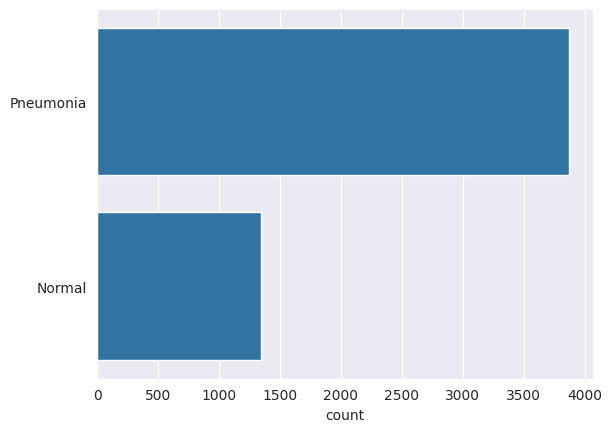

In [ ]:
"""
Author: Ivy Vo
Task: Data labeling
"""
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'NORMAL')

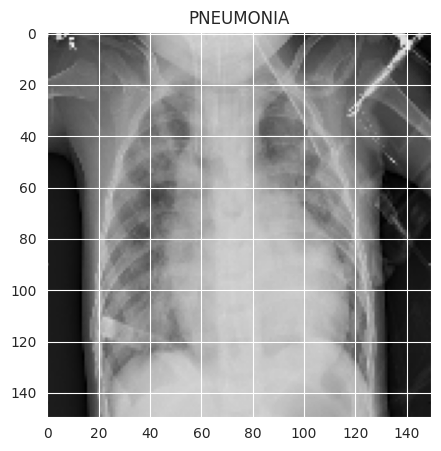

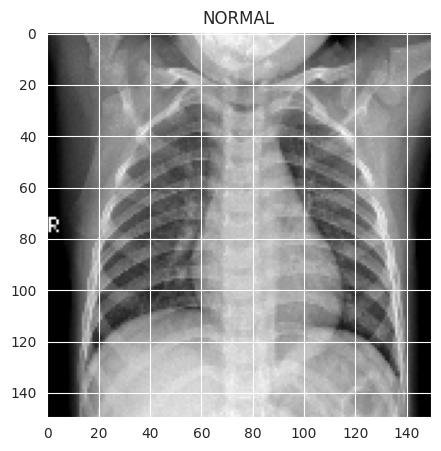

In [ ]:
"""
Author: Ivy Vo
Task: Data display
"""
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
"""
Author: Ivy Vo
Task: Creating test and training data
"""
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
"""
Author: Ivy Vo
Task: Data normalization
"""
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
"""
Author: Ivy Vo
Task: Data preprocessing
"""
# reshape data
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

print(x_train.shape)

(5216, 150, 150, 1)


In [ ]:
"""
Author: Tai Le
Task: Creating neural network layers
"""
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(0.1)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.dropout2 = nn.Dropout(0.2)
        self.batchnorm4 = nn.BatchNorm2d(128)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.dropout3 = nn.Dropout(0.2)
        self.batchnorm5 = nn.BatchNorm2d(256)
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.fc1 = nn.Linear(256 * 4 * 4, 128)
        self.dropout4 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.batchnorm1(x)
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.dropout1(x)
        x = self.batchnorm2(x)
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = self.batchnorm3(x)
        x = self.pool3(x)

        x = F.relu(self.conv4(x))
        x = self.dropout2(x)
        x = self.batchnorm4(x)
        x = self.pool4(x)

        x = F.relu(self.conv5(x))
        x = self.dropout3(x)
        x = self.batchnorm5(x)
        x = self.pool5(x)

        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout4(x)
        x = self.fc2(x)
        # x = torch.sigmoid(x)
        return x

model = ConvNet()
print(model)

ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout1): Dropout(p=0.1, inplace=False)
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout2): Dropout(p=0.2, inplace=False)
  (batchnorm4): BatchNorm2d(128, eps=1e-05, momen

In [ ]:
"""
Author: Tai Le
Task: Creating Pytorch data loader with image augmentation
"""
# prompt: Pytorch data loader with image augmentation

import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, inputs, labels=None, transform=None):
        self.inputs = inputs
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_image = self.inputs[idx]
        input_image = (input_image*255).astype(np.uint8)
        input_image = np.tile(input_image, [1, 1, 3])



        input_image = transforms.ToPILImage()(input_image)
        input_image = self.transform(input_image)


        input_image = input_image[0:1]
        # input_image = transforms.ToPILImage()(input_image)

        input_image = input_image.type(torch.float32)
        input_image = input_image.to("cuda")
        if self.labels is not None:
            label = self.labels[idx]
            label = torch.tensor(label)
            label = label.type(torch.float32)
            label = label.to("cuda")
            return input_image, label
        else:
            return input_image

# Define transformation for data augmentation
def add_noise(image):
    noise = np.random.normal(loc=0, scale=0.1, size=list(image.size)+[3])
    noisy_image = np.array(image) + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)

data_transforms = transforms.Compose([
    # transforms.RandomResizedCrop(224),
    # transforms.RandomHorizontalFlip(),

    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.3),  # Random color jitter
    transforms.RandomRotation(30),         # Random rotation up to 30 degrees
    transforms.Lambda(add_noise),          # Custom lambda function to add random noise
    transforms.RandomAffine(degrees=0, translate=(0.3, 0.3), scale=(0.7, 1.3), shear=(0, 0.4)),  # Random stretch
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406],
    #                      std=[0.229, 0.224, 0.225])
    ])

dummy_data_transforms = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406],
    #                      std=[0.229, 0.224, 0.225])
    ])

train_dataset = CustomDataset(x_train, labels=y_train, transform=data_transforms)
val_dataset = CustomDataset(x_val, labels=y_val, transform=dummy_data_transforms)
test_dataset = CustomDataset(x_test, labels=y_test, transform=dummy_data_transforms)



# # Create the DataLoader for the training data
train_dataloader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
)

# # Create the DataLoader for the validation data
val_dataloader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=True,
)

# # Create the DataLoader for the test data
test_dataloader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=True,
)

for inputs, labels in train_dataloader:
  print(inputs.shape)
  break

for inputs, labels in val_dataloader:
  print(inputs.shape)
  break

print(len(val_dataloader))


torch.Size([32, 1, 150, 150])
torch.Size([16, 1, 150, 150])
1


In [ ]:
"""
Author: Tai Le
Task: Model training
"""

def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0
        total_correct = 0
        total_samples = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            predicted = (outputs > 0).float()
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}, '
              f'Accuracy: {total_correct / total_samples:.4f}')

In [ ]:
"""
Author: Nhat Trinh
Task: Model testing
"""
def test_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            predicted = (outputs > 0).float()  # Threshold logits at 0 for binary classification
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    print(f'Test Loss: {total_loss / len(test_loader):.4f}, '
          f'Test Accuracy: {total_correct / total_samples:.4f}')

In [ ]:
"""
Author: Nhat Trinh
Task: Model validation
"""
def validate_model(model, val_loader, criterion):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.unsqueeze(1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            predicted = (outputs > 0).float()
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    avg_loss = total_loss / len(val_loader)
    avg_accuracy = total_correct / total_samples
    print(f'Validation Loss: {avg_loss:.4f}, Validation Accuracy: {avg_accuracy:.4f}')
    return avg_loss, avg_accuracy

In [ ]:
"""
Author: Nhat Trinh
Task: Running training with optimizer and test
"""
import torch
import torch.nn as nn
import torch.optim as optim
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = ConvNet()
model.to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epoch = 10


In [ ]:
train_model(model, train_dataloader, criterion, optimizer,epoch)

Epoch [1/10], Loss: 0.4026, Accuracy: 0.8230
Epoch [2/10], Loss: 0.2885, Accuracy: 0.8729
Epoch [3/10], Loss: 0.2590, Accuracy: 0.8884
Epoch [4/10], Loss: 0.2340, Accuracy: 0.9059
Epoch [5/10], Loss: 0.2154, Accuracy: 0.9143
Epoch [6/10], Loss: 0.1981, Accuracy: 0.9237
Epoch [7/10], Loss: 0.1988, Accuracy: 0.9195
Epoch [8/10], Loss: 0.1763, Accuracy: 0.9339
Epoch [9/10], Loss: 0.1639, Accuracy: 0.9369
Epoch [10/10], Loss: 0.1597, Accuracy: 0.9381


In [ ]:
test_model(model, test_dataloader, criterion)

Test Loss: 0.2270, Test Accuracy: 0.9006
